In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

with np.load(r"/content/drive/MyDrive/ScrewCell/padded_audio (clean).npz") as data:
    X = data['x']
    y = data['y']

In [ ]:
# Convert audio data into numpy array
padded_audio_np = np.array(X)

# Reshape for convolution
X = np.expand_dims(padded_audio_np, axis=2)

# Encode labels into integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # len(np.unique(y)) is the number of classes

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))


Epoch 1/10
26/26 [==============================] - 20s 232ms/step - loss: 1.5820 - accuracy: 0.2687 - val_loss: 1.5211 - val_accuracy: 0.3371
Epoch 2/10
26/26 [==============================] - 4s 171ms/step - loss: 1.5796 - accuracy: 0.2687 - val_loss: 1.5626 - val_accuracy: 0.3371
Epoch 3/10
26/26 [==============================] - 5s 188ms/step - loss: 1.5705 - accuracy: 0.2749 - val_loss: 1.5148 - val_accuracy: 0.2123
Epoch 4/10
26/26 [==============================] - 5s 191ms/step - loss: 1.3756 - accuracy: 0.4341 - val_loss: 1.0339 - val_accuracy: 0.7151
Epoch 5/10
26/26 [==============================] - 4s 172ms/step - loss: 0.9380 - accuracy: 0.6530 - val_loss: 0.6969 - val_accuracy: 0.7728
Epoch 6/10
26/26 [==============================] - 5s 190ms/step - loss: 0.6930 - accuracy: 0.7525 - val_loss: 0.6205 - val_accuracy: 0.8138
Epoch 7/10
26/26 [==============================] - 5s 190ms/step - loss: 0.5092 - accuracy: 0.8259 - val_loss: 0.5795 - val_accuracy: 0.8585
Epoch

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy*100}")

Accuracy: 85.8473002910614


17/17 [==============================] - 1s 48ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       181
           1       0.79      0.90      0.84        60
           2       0.73      0.89      0.80       114
           3       0.82      0.73      0.77        55
           4       0.96      0.83      0.89       127

    accuracy                           0.86       537
   macro avg       0.85      0.85      0.84       537
weighted avg       0.87      0.86      0.86       537



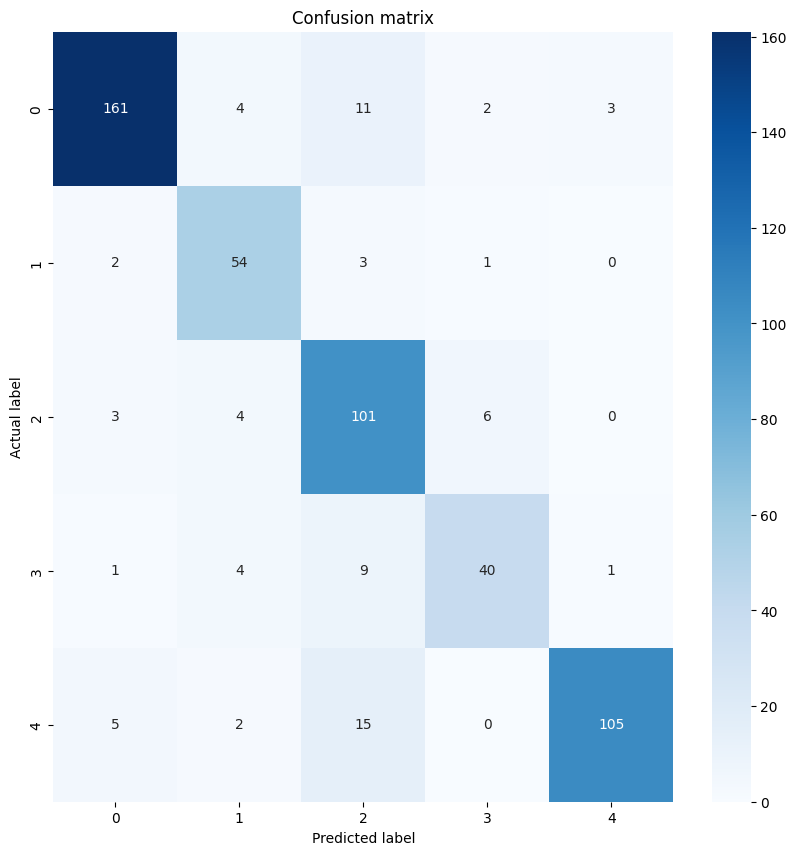

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the test dataset
y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert test observations to one hot vectors
#y_true = np.argmax(y_test, axis = 1)

# If y_test is not one-hot encoded, you can use it directly
y_true = y_test

print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=list(map(str,np.unique(y_true)))))

# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
!pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=9c539a699e38f205c44ea004a828aeeb6f491e7b98ed3908c480665ebef79091
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

data_folder = r"/content/drive/MyDrive/Intrinsic data"  # Replace with your folder

# Find all csv files
csv_files = []
labels = []
for root, dirs, files in os.walk(data_folder):
    for file in files:
        if file.endswith('.csv'):  # Adjust this if you're using a different file format
            csv_files.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Load data
data_list = [pd.read_csv(file).values for file in csv_files]

# Find max sequence length
max_len = max(len(data) for data in data_list)

# Pad sequences
padded_data = pad_sequences(data_list, maxlen=max_len, dtype='float32')

# Convert labels to numerical
unique_labels = np.unique(labels)
label_dict = {label: i for i, label in enumerate(unique_labels)}
num_labels = [label_dict[label] for label in labels]

ValueError: ignored